In [214]:
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import numpy as np
from autograd import grad
import autograd.numpy as anp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import plotly as py

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


# First order ODE

Differential equation to solve:
$$\frac{df(x)}{x} = \sin(x)$$

Boundary condition:
$$f(0) = 2.5$$

Trial function (to enforce the boundary condition):
$$f(x) = xN_{\theta}(x) + 2.5 $$


In [151]:
model = tf.keras.Sequential()
model.add(layers.InputLayer((1,)))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1))

def custom_loss(y_pred, y_true):
    return K.square(tf.math.multiply(K.gradients(model.output, model.input), model.input) + model.output - K.sin(model.input)) 

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=custom_loss,
              metrics=['accuracy'])

In [152]:
data = np.random.random((5000, 1)) * 10
labels = np.sin(data)

model.fit(data, labels, epochs=100, batch_size=32)

Epoch 1/100
5000/5000 [==============================] - 1s 130us/sample - loss: 0.4770 - acc: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 0s 77us/sample - loss: 0.3891 - acc: 0.0000e+00
Epoch 3/100
5000/5000 [==============================] - 0s 89us/sample - loss: 0.3549 - acc: 2.0000e-04
Epoch 4/100
5000/5000 [==============================] - 0s 87us/sample - loss: 0.3311 - acc: 2.0000e-04
Epoch 5/100
5000/5000 [==============================] - 0s 86us/sample - loss: 0.3073 - acc: 2.0000e-04
Epoch 6/100
5000/5000 [==============================] - 0s 85us/sample - loss: 0.2813 - acc: 2.0000e-04
Epoch 7/100
5000/5000 [==============================] - 0s 81us/sample - loss: 0.2369 - acc: 2.0000e-04
Epoch 8/100
5000/5000 [==============================] - 0s 92us/sample - loss: 0.1753 - acc: 2.0000e-04
Epoch 9/100
5000/5000 [==============================] - 0s 87us/sample - loss: 0.1319 - acc: 2.0000e-04
Epoch 10/100
5000/5000 [==============================

5000/5000 [==============================] - 0s 98us/sample - loss: 1.5787e-04 - acc: 2.0000e-04
Epoch 78/100
5000/5000 [==============================] - 0s 94us/sample - loss: 1.8662e-04 - acc: 2.0000e-04
Epoch 79/100
5000/5000 [==============================] - 0s 86us/sample - loss: 1.4693e-04 - acc: 2.0000e-04
Epoch 80/100
5000/5000 [==============================] - 0s 81us/sample - loss: 1.4623e-04 - acc: 2.0000e-04
Epoch 81/100
5000/5000 [==============================] - 0s 91us/sample - loss: 1.3261e-04 - acc: 2.0000e-04
Epoch 82/100
5000/5000 [==============================] - 0s 91us/sample - loss: 1.4371e-04 - acc: 2.0000e-04
Epoch 83/100
5000/5000 [==============================] - 0s 82us/sample - loss: 1.8910e-04 - acc: 2.0000e-04
Epoch 84/100
5000/5000 [==============================] - 0s 76us/sample - loss: 1.2098e-04 - acc: 2.0000e-04
Epoch 85/100
5000/5000 [==============================] - 0s 85us/sample - loss: 1.0407e-04 - acc: 2.0000e-04
Epoch 86/100
5000/5000 

In [161]:
x_test = np.linspace(-5,15,100)
y_test = np.multiply(model.predict(x_test).T, x_test).T + 2.5
y_true = -np.cos(x_test) + 3.5

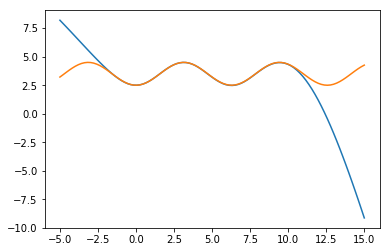

In [162]:
plt.plot(x_test, y_test)
plt.plot(x_test, y_true)
plt.show()

# First order ODE

Differential equation to solve (taken from Paul's online notes):
$$t\frac{dy}{dt}+2y=t^2-t+1$$

Boundary condition:
$$y(1) = 0.5$$

Trial function (to enforce the boundary condition):
$$y(t) = (t-1)N_{\theta}(t) + 0.5 $$

Analytic solution:
$$y(t) = \frac{1}{4}t^2-\frac{1}{3}t+\frac{1}{2}+\frac{1}{12t^2}$$

In [167]:
model = tf.keras.Sequential()
model.add(layers.InputLayer((1,)))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1))

def custom_loss(y_pred, y_true):
    grad_output = K.gradients(model.output, model.input)
    y = (model.input - 1) * model.output + 0.5
    grad_y = ((model.input - tf.constant(1.0))* grad_output) + model.output
    lhs = model.input * grad_y + 2 * y
    rhs = tf.square(model.input) - model.input + 1
    return tf.square(lhs - rhs)

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=custom_loss,
              metrics=['accuracy'])

In [175]:
input_length = 2048
data = np.linspace(0.1, 2, input_length)
labels = np.zeros(input_length)

model.fit(data, labels, epochs=100, batch_size=32)

Epoch 1/100
2048/2048 [==============================] - 0s 82us/sample - loss: 0.0180 - acc: 1.0000
Epoch 2/100
2048/2048 [==============================] - 0s 88us/sample - loss: 0.0179 - acc: 1.0000
Epoch 3/100
2048/2048 [==============================] - 0s 88us/sample - loss: 0.0177 - acc: 1.0000
Epoch 4/100
2048/2048 [==============================] - 0s 94us/sample - loss: 0.0176 - acc: 1.0000
Epoch 5/100
2048/2048 [==============================] - 0s 93us/sample - loss: 0.0175 - acc: 1.0000
Epoch 6/100
2048/2048 [==============================] - 0s 92us/sample - loss: 0.0174 - acc: 1.0000
Epoch 7/100
2048/2048 [==============================] - 0s 106us/sample - loss: 0.0173 - acc: 1.0000
Epoch 8/100
2048/2048 [==============================] - 0s 100us/sample - loss: 0.0172 - acc: 1.0000
Epoch 9/100
2048/2048 [==============================] - 0s 95us/sample - loss: 0.0171 - acc: 1.0000
Epoch 10/100
2048/2048 [==============================] - 0s 95us/sample - loss: 0.0171 -

2048/2048 [==============================] - 0s 107us/sample - loss: 0.0168 - acc: 1.0000
Epoch 81/100
2048/2048 [==============================] - 0s 109us/sample - loss: 0.0170 - acc: 1.0000
Epoch 82/100
2048/2048 [==============================] - 0s 107us/sample - loss: 0.0169 - acc: 1.0000
Epoch 83/100
2048/2048 [==============================] - 0s 97us/sample - loss: 0.0167 - acc: 1.0000
Epoch 84/100
2048/2048 [==============================] - 0s 104us/sample - loss: 0.0168 - acc: 1.0000
Epoch 85/100
2048/2048 [==============================] - 0s 100us/sample - loss: 0.0167 - acc: 1.0000
Epoch 86/100
2048/2048 [==============================] - 0s 101us/sample - loss: 0.0168 - acc: 1.0000
Epoch 87/100
2048/2048 [==============================] - 0s 101us/sample - loss: 0.0167 - acc: 1.0000
Epoch 88/100
2048/2048 [==============================] - 0s 100us/sample - loss: 0.0167 - acc: 1.0000
Epoch 89/100
2048/2048 [==============================] - 0s 100us/sample - loss: 0.016

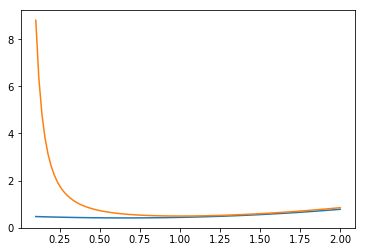

In [177]:
x_test = np.linspace(0.1,2,100)
y_test = np.multiply(model.predict(x_test - 1).T, x_test).T + 0.5
y_true = 1/4 * np.square(x_test) - 1/3 * x_test + 1/2 + 1/(12*np.square(x_test))
plt.plot(x_test, y_test)
plt.plot(x_test, y_true)
plt.show()

# Second order ODE

Differential equation to solve:
$$t\frac{d^2y}{dx^2}+4\frac{dy}{dx}+3y=x$$

Boundary condition:
$$y(0) = 1, y'(0)=0$$

Trial function (to enforce the boundary condition):
$$y(x) = (x-1)N_{\theta}(t) + (x-1) +  $$

Analytic solution:
$$y(t) = \frac{1}{4}t^2-\frac{1}{3}t+\frac{1}{2}+\frac{1}{12t^2}$$

# First order PDE
Differential equation to solve:
$$2\frac{dz}{dz} + \frac{dz}{dy} = 2y$$

Boundary condition:
$$z(x,0) = \cos3x$$

Trial function (to enforce the boundary condition):
$$z(x,y) = yN_{\theta}(x,y) + \cos(3x) $$

Analytic solution:
$$z(x,y) = \cos(3(x-2y)) + y^2$$


In [190]:
model = tf.keras.Sequential()
model.add(layers.InputLayer((2,)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1))

def custom_loss(y_pred, y_true):
    N = model.output
    x,y = model.input[0], model.input[1]
    grad_N = K.gradients(model.output, model.input)
    dN_dx, dN_dy = grad_N[0][0], grad_N[0][1]
    dz_dx = y * dN_dx - 3 * K.sin(3*x)
    dz_dy = y * dN_dy + N
    
    return tf.square(2 * dz_dx + dz_dy - 2*y)

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss=custom_loss,
              metrics=['accuracy'])

In [192]:
input_length = 5000
data = np.random.random((input_length, 2)) * 5
labels = np.zeros(input_length)

model.fit(data, labels, epochs=100, batch_size=64)

Epoch 1/100
5000/5000 [==============================] - 0s 26us/sample - loss: 19.1106 - acc: 0.1320
Epoch 2/100
5000/5000 [==============================] - 0s 24us/sample - loss: 21.4242 - acc: 0.1688
Epoch 3/100
5000/5000 [==============================] - 0s 23us/sample - loss: 19.9211 - acc: 0.1570
Epoch 4/100
5000/5000 [==============================] - 0s 23us/sample - loss: 20.2685 - acc: 0.1546
Epoch 5/100
5000/5000 [==============================] - 0s 24us/sample - loss: 19.6826 - acc: 0.1436
Epoch 6/100
5000/5000 [==============================] - 0s 26us/sample - loss: 18.5266 - acc: 0.1506
Epoch 7/100
5000/5000 [==============================] - 0s 25us/sample - loss: 20.0175 - acc: 0.1492
Epoch 8/100
5000/5000 [==============================] - 0s 24us/sample - loss: 18.7223 - acc: 0.1334
Epoch 9/100
5000/5000 [==============================] - 0s 25us/sample - loss: 20.2903 - acc: 0.1248
Epoch 10/100
5000/5000 [==============================] - 0s 27us/sample - loss: 2

5000/5000 [==============================] - 0s 25us/sample - loss: 20.2992 - acc: 0.1716
Epoch 81/100
5000/5000 [==============================] - 0s 24us/sample - loss: 18.6276 - acc: 0.2046
Epoch 82/100
5000/5000 [==============================] - 0s 24us/sample - loss: 21.2804 - acc: 0.2136
Epoch 83/100
5000/5000 [==============================] - 0s 25us/sample - loss: 19.1532 - acc: 0.1950
Epoch 84/100
5000/5000 [==============================] - 0s 26us/sample - loss: 22.0011 - acc: 0.1540
Epoch 85/100
5000/5000 [==============================] - 0s 27us/sample - loss: 18.5221 - acc: 0.1750
Epoch 86/100
5000/5000 [==============================] - 0s 26us/sample - loss: 19.6077 - acc: 0.1642
Epoch 87/100
5000/5000 [==============================] - 0s 26us/sample - loss: 19.9815 - acc: 0.1382
Epoch 88/100
5000/5000 [==============================] - 0s 23us/sample - loss: 20.6588 - acc: 0.1516
Epoch 89/100
5000/5000 [==============================] - 0s 25us/sample - loss: 19.46

In [254]:
plot_size = 20
x = np.linspace(0, 5, plot_size)
y = np.linspace(0, 5, plot_size)
xx, yy = np.meshgrid(x, y)
z = model.predict(np.array([xx.flatten(),yy.flatten()]).T)
z = z.T + np.cos(3 * xx.flatten())
zz = z.reshape((plot_size, -1))

z_true = np.array([np.cos(3(x - 2*y)) + y**2] for x, y in zip(xx,yy))
zz_true = z.reshape((plot_size, -1))

In [265]:
data = [
    go.Surface(
        z=zz
    ),
    go.Surface(
        z=zz_true
    )
]
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig, filename='elevations-3d-surface')

C:\Users\Dave Lei\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:621: UserWarning:

Your filename `elevations-3d-surface` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Dave Lei\\RL, Control\\elevations-3d-surface.html'

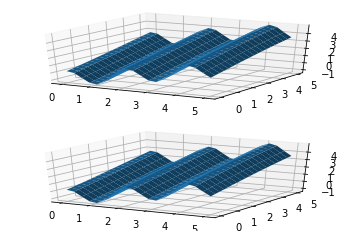

In [263]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(xx,yy,zz)
ax = fig.add_subplot(212, projection='3d')
ax.plot_surface(xx,yy,zz)

# HJB equation
Differential equation to solve:
$$2\frac{dz}{dz} + \frac{dz}{dy} = 2y$$

Boundary condition:
$$z(x,0) = \cos3x$$

Trial function (to enforce the boundary condition):
$$z(x,y) = yN_{\theta}(x,y) + \cos(3x) $$

Analytic solution:
$$z(x,y) = \cos(3(x-2y)) + y^2$$


In [329]:
model = tf.keras.Sequential()
model.add(layers.InputLayer((4,)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1))

gravity = 9.81

def custom_loss(y_pred, y_true):
    N = model.output
    px, py, vx, vy = tf.unstack(model.input, axis = 1)
    grad_N = K.gradients(model.output, model.input)
    dN_dpx, dN_dpy, dN_dvx, dN_dvy = tf.unstack(grad_N[0], axis = 1)
    
    u = tf.atan(dN_dvx / dN_dvy) / 2.0
    
    ax = gravity * tf.sin(u) * tf.cos(u)
    ay = -gravity * tf.sin(u) * tf.sin(u)
    
    diff_equation = 1 + dN_dpx * vx + dN_dpy * vy + dN_dvx * ax + dN_dvy * ay 
    
    return tf.square(diff_equation)

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=custom_loss,
              metrics=['accuracy'])

In [334]:
input_length = 5000
data = np.array([np.linspace(0,10,input_length) for _ in range(4)]).T
labels = np.zeros(input_length)

model.fit(data, labels, epochs=100, batch_size=64)

Epoch 1/100
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0021 - acc: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 0s 27us/sample - loss: 0.0016 - acc: 0.1280
Epoch 3/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 0.5388
Epoch 4/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 0.6814
Epoch 5/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 0.7564
Epoch 6/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 0.8044
Epoch 7/100
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0012 - acc: 0.8314
Epoch 8/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 0.8534
Epoch 9/100
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0012 - acc: 0.8692
Epoch 10/100
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0012

5000/5000 [==============================] - 0s 32us/sample - loss: 5.9900e-04 - acc: 0.9932
Epoch 80/100
5000/5000 [==============================] - 0s 33us/sample - loss: 6.0532e-04 - acc: 0.9932
Epoch 81/100
5000/5000 [==============================] - 0s 32us/sample - loss: 6.0906e-04 - acc: 0.9934
Epoch 82/100
5000/5000 [==============================] - 0s 32us/sample - loss: 7.1129e-04 - acc: 0.9940
Epoch 83/100
5000/5000 [==============================] - 0s 34us/sample - loss: 5.8762e-04 - acc: 0.9942
Epoch 84/100
5000/5000 [==============================] - 0s 30us/sample - loss: 5.9622e-04 - acc: 0.9944
Epoch 85/100
5000/5000 [==============================] - 0s 33us/sample - loss: 5.7799e-04 - acc: 0.9944
Epoch 86/100
5000/5000 [==============================] - 0s 30us/sample - loss: 5.7748e-04 - acc: 0.9944
Epoch 87/100
5000/5000 [==============================] - 0s 33us/sample - loss: 5.6411e-04 - acc: 0.9946
Epoch 88/100
5000/5000 [==============================] - 0

In [335]:
plot_size = 20
x = np.linspace(-10, 10, plot_size)
y = np.linspace(-10, 10, plot_size)
vx = np.zeros(plot_size ** 2)
vy = np.zeros(plot_size ** 2)
xx, yy = np.meshgrid(x, y)
z = model.predict(np.array([xx.flatten(),yy.flatten(), vx, vy]).T)
zz = z.reshape((plot_size, -1))

z_true = np.array([np.cos(3(x - 2*y)) + y**2] for x, y in zip(xx,yy))
zz_true = z.reshape((plot_size, -1))

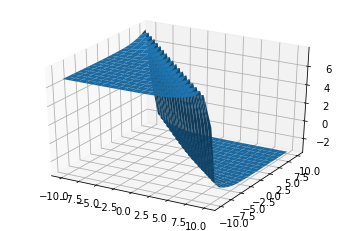

In [336]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,zz)

In [337]:
data = [
    go.Surface(
        z=zz
    )
]
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig, filename='HJB')

'file://C:\\Users\\Dave Lei\\RL, Control\\HJB.html'

In [340]:
plot_input = np.zeros((4,plot_size))
plot_input[1,:] += np.linspace(-5, 5, plot_size)

z = model.predict(plot_input.T)

In [343]:

K.gradients(model.predict, model.input)

TypeError: Failed to convert object of type <class 'method'> to Tensor. Contents: <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000020007E55400>>. Consider casting elements to a supported type.

In [369]:
def grad_N(state):

    y = layers.Input(shape=(4,))

    # this is the gradient of output with respect to inputs given some input data
    grads = K.gradients(model.output, model.input)
    func = K.function([model.input], [grads])

    # usage in test mode = 0
    out = func(y)
    
    return out

In [370]:
state = np.zeros((1,4))
grad_N(state)

InvalidArgumentError: You must feed a value for placeholder tensor 'input_44' with dtype float and shape [?,4]
	 [[{{node input_44}}]]